In [ ]:
import lightgbm as lgb
import wandb
import pandas as pd


run = wandb.init()
artifact = run.use_artifact('andrea-faviait/swiss-delay-prediction/model_o8eefm0p:v0', type='model')
artifact_dir = artifact.download()
model = lgb.Booster(model_file=artifact_dir+'/model_ckpt_0.txt')

: 

In [ ]:
train_df = pd.read_csv('/Users/favea/Downloads/swiss-data/train_df_balanced_0.8.csv' ,index_col=0)
train_df = train_df.drop(['delay_minutes','scheduled_time_departure','year'],axis=1)
x_train, y_train = train_df.drop('delayed',axis=1), train_df.loc[:,'delayed']
x_train.carrier = x_train.carrier.astype('category')
x_train.origin = x_train.origin.astype('category')
x_train.destination = x_train.destination.astype('category')
x_train.previous_is_delayed = x_train.previous_is_delayed.astype('category')

lgb_train = lgb.Dataset(x_train, y_train, categorical_feature = ['carrier','origin','destination','previous_is_delayed'], free_raw_data=False)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

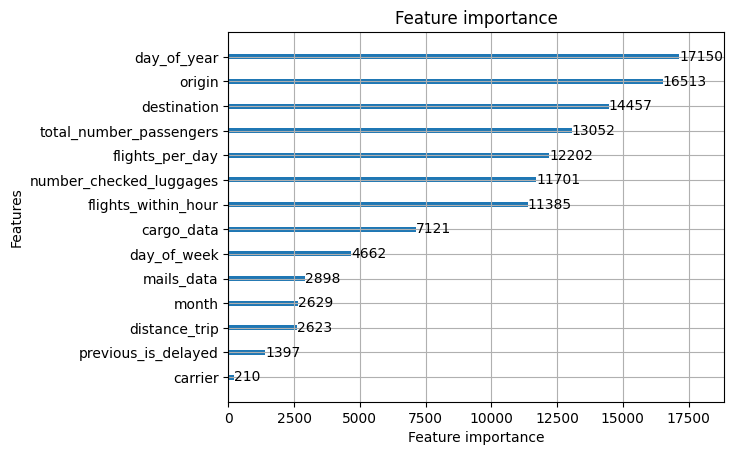

In [ ]:
lgb.plot_importance(model)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

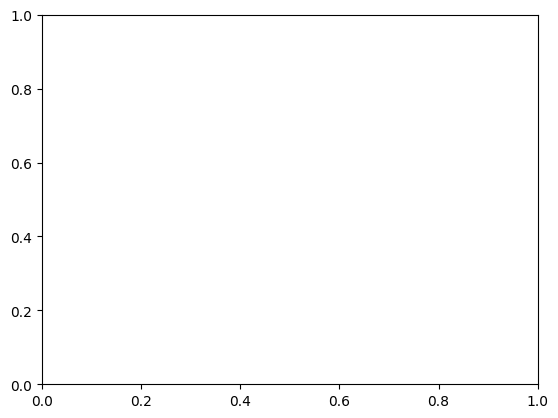

In [ ]:
lgb.plot_tree(model)